In [2]:
from solcore import material
from solcore.structure import Layer, Junction, TunnelJunction
from solcore.solar_cell import SolarCell
from solcore.solar_cell_solver import solar_cell_solver
from solcore.light_source import LightSource
import solcore.poisson_drift_diffusion as PDD
import numpy as np
import matplotlib.pyplot as plt

In [3]:
T = 298
wl = np.linspace(350, 1050, 301) * 1e-9
window_bottom = material("GaInP")(T=T, Nd=5e24, In=0.49)    
n_GaAs = material("GaAs")(T=T, Nd=1e24)
p_GaAs = material("GaAs")(T=T, Na=8e22)
bsf_bottom = material("GaInP")(T=T, Na=5e24, In=0.49)
light_source = LightSource(
    source_type="standard",
    version="AM1.5g",
    x=wl,
    output_units="photon_flux_per_m",
    concentration=1,
)

In [4]:
def solver_GaAs_for_sweep(Nd, width):
    n_GaAs = material("GaAs")(T=T, Nd=Nd)
    p_GaAs = material("GaAs")(T=T, Na=8e22)
    GaAs_junction = Junction(
    [
        # Layer(width=10e-9, material=window_bottom, role="Window"),  #In width Nd
        Layer(width=width, material=n_GaAs, role="Emitter"),       #Nd width
        Layer(width=2000e-9, material=p_GaAs, role="Base"),         #Na width
        # Layer(width=200e-9, material=bsf_bottom, role="BSF"),       #Na In
    ],
    T=T,
    kind="PDD")
    my_solar_cell = SolarCell([GaAs_junction],T=T,substrate=p_GaAs,)
    solar_cell_solver(my_solar_cell,"iv",
               user_options={
                   "light_source": light_source,
                   "wavelength": wl,
                   "optics_method": 'TMM',
                   "light_iv": True,
                   "mpp": True,
                   "voltages": V,
                   "internal_voltages": vint,
    },)  
    return my_solar_cell  


In [5]:
vint = np.linspace(-2, 1, 300)
V = np.linspace(-2, 0, 150)
solver_GaAs_for_sweep(1e28,150e-9).iv["Pmpp"]


Calculating RAT...
Calculating absorption profile...


Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


83.89259077504687

In [6]:
# width_con = 14
doped_con = 19

# con_width = np.power(10, np.linspace(-9, -4, width_con))
con_doped = np.power(10, np.linspace(14, 28, doped_con))
vint = np.linspace(-2, 1, 300)
V = np.linspace(-2, 0, 150)

isc_np = np.zeros(doped_con)
voc_np = np.zeros(doped_con)
FF_np = np.zeros(doped_con)
pmpp_np = np.zeros(doped_con)
# allI_np = np.zero((width_con, doped_con))
index = 0
N = doped_con
for i, doped in enumerate(con_doped):
    my_solar_cell = solver_GaAs_for_sweep(doped,150e-9)
    isc_np[i] =  my_solar_cell.iv["Isc"]
    voc_np[i] = my_solar_cell.iv["Voc"]
    FF_np[i]  = my_solar_cell.iv["FF"]
    pmpp_np[i] = my_solar_cell.iv["Pmpp"]
    # allI_np[i, j] =my_solar_cell.iv["IV"][1]
    # emitter_width(ii)
    index += 1
    print('==============================\n')
    print(int(index / N * 100), "%\n")
    print('==============================\n')


Calculating RAT...
Calculating absorption profile...


Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...

5 %


Calculating RAT...
Calculating absorption profile...


C:\Users\usuwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\solcore\analytic_solar_cells\IV.py:110: RuntimeWarning: invalid value encountered in scalar divide
  FF = Pmpp / (Isc * Voc)


Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...

10 %


Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...

15 %


Calculating RAT...
Calculating absorption profile...
Solving IV of the junctions...
Solving IV...
Processing structure...
...done!

Solving equilibrium...
...done!

...done!

Processing structure...
...done!

Solving equilibrium...
...done!

...done!

...done!

Solving IV of the tunnel junctions...
Solving IV of the total solar cell...

21 %


Calculating RAT

In [7]:
from numpy import ma
from matplotlib import cm, ticker

X, Y = np.meshgrid(con_width, con_doped)
eff = pmpp_np / light_source.power_density * 100
eff = ma.masked_where(eff <= 0, eff)
fig2, axes = plt.subplots(2, 2, figsize=(11.25, 8))

cs1 = axes[0, 0].contourf(X, Y, eff, 100, cmap=cm.jet)
axes[0, 0].set_xlabel("width")
axes[0, 0].set_ylabel("doping concentration")
cbar1 = fig2.colorbar(cs1)

cs2 = axes[0, 1].contourf(X, Y, abs(isc_np), 100, cmap=cm.jet)
axes[0, 1].set_xlabel("Concentration (suns)")
axes[0, 1].set_ylabel("I$_{SC}$ (Am$^{-2}$)")
cbar2 = fig2.colorbar(cs2)


cs3 = axes[1, 0].contourf(X, Y, abs(voc_np), 100, cmap=cm.jet)
axes[1, 0].set_xlabel("Concentration (suns)")
axes[1, 0].set_ylabel("V$_{OC}$ (V)")
cbar3 = fig2.colorbar(cs3)

cs4 = axes[1, 1].contourf(X, Y, abs(FF_np) * 100, 100, cmap=cm.jet)
axes[1, 1].set_xlabel("Concentration (suns)")
axes[1, 1].set_ylabel("Fill Factor (%)")
cbar4 = fig2.colorbar(cs4)

plt.tight_layout()

NameError: name 'con_width' is not defined

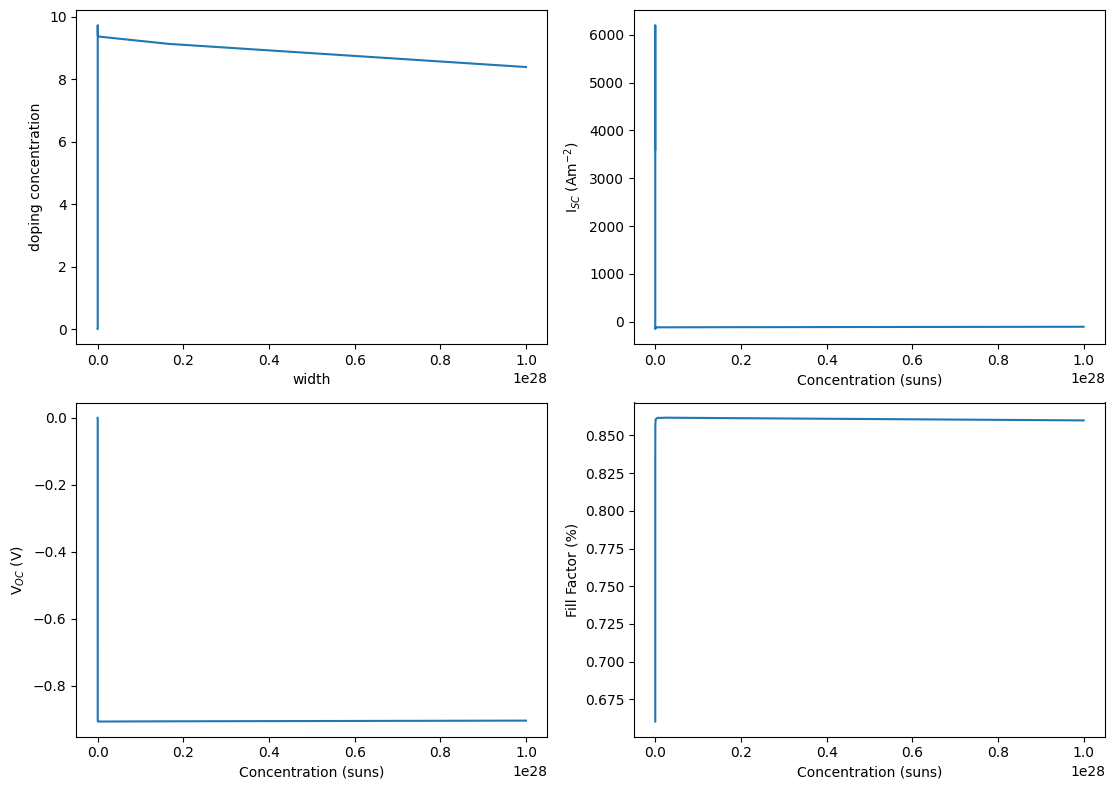

In [10]:
from numpy import ma
from matplotlib import cm, ticker

# X, Y = np.meshgrid(con_width, con_doped)
eff = pmpp_np / light_source.power_density * 100
# eff = ma.masked_where(eff <= 0, eff)
fig2, axes = plt.subplots(2, 2, figsize=(11.25, 8))

axes[0, 0].plot(con_doped, eff)
axes[0, 0].set_xlabel("width")
axes[0, 0].set_ylabel("doping concentration")
# cbar1 = fig2.colorbar(cs1)

axes[0, 1].plot(con_doped, isc_np)
axes[0, 1].set_xlabel("doping conecentration")
axes[0, 1].set_ylabel("I$_{SC}$ (Am$^{-2}$)")
# cbar2 = fig2.colorbar(cs2)


axes[1, 0].plot(con_doped, voc_np)
axes[1, 0].set_xlabel("doping conecentrationn")
axes[1, 0].set_ylabel("V$_{OC}$ (V)")
# cbar3 = fig2.colorbar(cs3)

axes[1, 1].plot(con_doped, FF_np)
axes[1, 1].set_xlabel("doping conecentration")
axes[1, 1].set_ylabel("Fill Factor (%)")
# cbar4 = fig2.colorbar(cs4)

plt.tight_layout()

In [8]:
pmpp_np

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 71.26618386, 97.28899564, 94.29781013, 93.74456177,
       93.62433078, 93.28137524, 91.29434717, 83.89259078])